In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/income.csv")
df


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<function matplotlib.pyplot.show(close=None, block=None)>

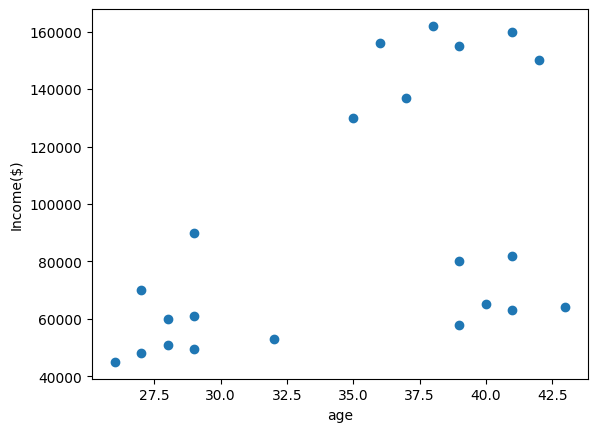

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("age")
plt.ylabel("Income($)")
plt.show

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df["Income"]=scaler.transform(df[['Income($)']])
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),Income
0,Rob,0.058824,70000,0.213675
1,Michael,0.176471,90000,0.384615
2,Mohan,0.176471,61000,0.136752
3,Ismail,0.117647,60000,0.128205
4,Kory,0.941176,150000,0.897436


In [ ]:
s=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i)
    kmean.fit(df[['Age','Income($)']])
    s.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

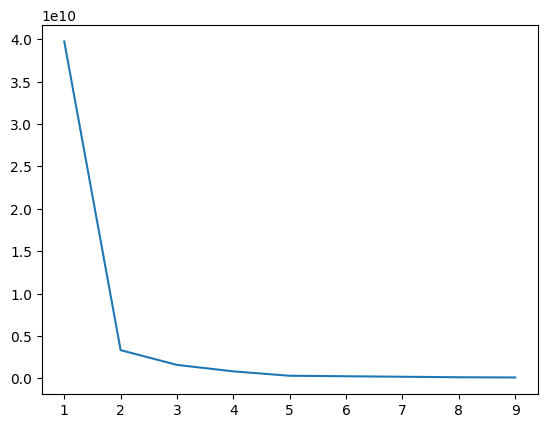

In [ ]:
plt.plot(range(1,10),s)

In [ ]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),Income,cluster
0,Rob,0.058824,70000,0.213675,1
1,Michael,0.176471,90000,0.384615,1
2,Mohan,0.176471,61000,0.136752,1
3,Ismail,0.117647,60000,0.128205,1
4,Kory,0.941176,150000,0.897436,0


In [ ]:
km.cluster_centers_

array([[7.22689076e-01, 1.50000000e+05],
       [4.23529412e-01, 6.26333333e+04]])

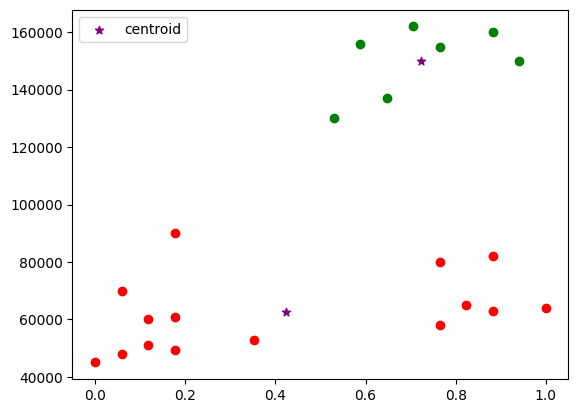

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label='centroid')
plt.legend()